# Como a empresa pode melhorar a coloboração entre as equipes?

## 📖 Contexto
Você trabalha no setor de analytics de uma empresa multinacional, e o chefe do RH solicitou a sua ajuda para mapear a rede de comunicação entre os empregados da empresa, usando dados de mensagens

Eles planejam usar a rede de comunicação dos empregados para entender melhor a forma como a empresa compartilha suas informações internamente. O objetivo principal é achar maneiras de melhorar a comunicação dentro da empresa

## 💾 Os dados

A empresa tem dados relativos a seis meses da comunicação entre os empregados, para serem analisados. Por motivos de privacidade, apenas foi disponibilizado quem enviou a mensagem, para quem, e o tamanho da mensagem [(source)](https://snap.stanford.edu/data/CollegeMsg.html). 

 "Mensagens" tem as informações de quem enviou, quem recebeu e o horario;

- "sender" - id do empregado que enviou a mensagem.
- "receiver" - id do empregado que recebeu a mensagem.
- "timestamp" - a data e hora da mensagem no modelo.
- "message_lenght" - o número de palavras na mensagem.

 "Empregados" tem informações de cada empregado;
- "id" - id do empregado.
- "department" - o departamento do empregado dentro da empresa. 
- "location" - o pais onde o empregado mora.
- "age" - a idade do empregado.

_**Acknowledgments:** Pietro Panzarasa, Tore Opsahl, and Kathleen M. Carley. "Patterns and dynamics of users' behavior and interaction: Network analysis of an online community." Journal of the American Society for Information Science and Technology 60.5 (2009): 911-932._

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

In [2]:
mensagens = pd.read_csv('data/messages.csv', parse_dates= ['timestamp'])

In [3]:
empregados = pd.read_csv('data/employees.csv')

## Principais Descobertas

- Os departamentos que mais mandam mensagens são Vendas, Operações e Administração
- O empregado com mais conexões é o emprego com id 598 do departamento de Operações. E o com menos e o do id 605 do departamento da Administração
- O empregado mais influente é o de id 605 da administração

## Análise

Antes de começar a analisar os dados, primeiro é necessário verificar se não existem inconsistências nos dados

In [4]:
# verificando se existem incosistencias os dados em faltando
empregados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          664 non-null    int64 
 1   department  664 non-null    object
 2   location    664 non-null    object
 3   age         664 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 20.9+ KB


In [5]:
mensagens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3512 entries, 0 to 3511
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   sender          3512 non-null   int64         
 1   receiver        3512 non-null   int64         
 2   timestamp       3512 non-null   datetime64[ns]
 3   message_length  3512 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 109.9 KB


Não existem dados nulos em nenhum dos dois conjuntos de dados

In [6]:
empregados.describe()

,id,age
count,664.000000,664.000000
mean,793.710843,40.921687
std,498.462869,10.489521
min,3.000000,22.000000
25%,364.750000,33.000000
50%,725.500000,40.000000
75%,1191.500000,50.000000
max,1890.000000,59.000000


In [7]:
empregados.department.value_counts()

Sales          161
Admin          140
Operations     134
Engineering    100
IT              77
Marketing       52
Name: department, dtype: int64

In [8]:
empregados.location.value_counts()

US         277
France     157
Germany     99
UK          70
Brasil      61
Name: location, dtype: int64

In [9]:
mensagens.describe()

,sender,receiver,message_length
count,3512.000000,3512.000000,3512.000000
mean,591.953303,627.052677,48.450740
std,397.953749,460.981865,22.857461
min,79.000000,3.000000,10.000000
25%,332.000000,277.000000,29.000000
50%,509.000000,509.000000,49.000000
75%,605.000000,878.000000,68.000000
max,1881.000000,1890.000000,88.000000


Todos os dados aparentam estar de acordo com o proposto, e os tipos de dados estão definidos de forma satisfátoria

### Atividade dos Departamentos

In [10]:
# incluindo os dados dos empregados nas mensagens, uma vez para os de rementente e outra pro destinatário
mensagens_completo = mensagens.merge(empregados,right_on='id',left_on='sender')\
.merge(empregados,right_on='id',left_on='receiver',suffixes=('_sender','_receiver')).drop(['id_sender','id_receiver'],axis=1)

In [11]:
mensagens_completo.head()

,sender,receiver,timestamp,message_length,department_sender,location_sender,age_sender,department_receiver,location_receiver,age_receiver
0,79,48,2021-06-02 05:41:34,88,Sales,France,33,IT,France,34
1,144,48,2021-06-05 11:19:34,33,Sales,US,50,IT,France,34
2,144,48,2021-06-05 11:35:09,85,Sales,US,50,IT,France,34
3,144,48,2021-06-05 11:39:57,69,Sales,US,50,IT,France,34
4,144,48,2021-06-07 08:09:32,28,Sales,US,50,IT,France,34


In [12]:
# Contando o número de mensagens enviadas por cada departamento

enviadas_departamento = mensagens_completo.department_sender.value_counts()
enviadas_departamento

Sales          1551
Operations     1013
Admin           857
IT               49
Engineering      26
Marketing        16
Name: department_sender, dtype: int64

In [13]:
# Contando o número de mensagens recebidas por cada departamento
recebidas_departamento = mensagens_completo.department_receiver.value_counts()
recebidas_departamento

Sales          1229
Operations      845
Admin           797
Engineering     252
IT              249
Marketing       140
Name: department_receiver, dtype: int64

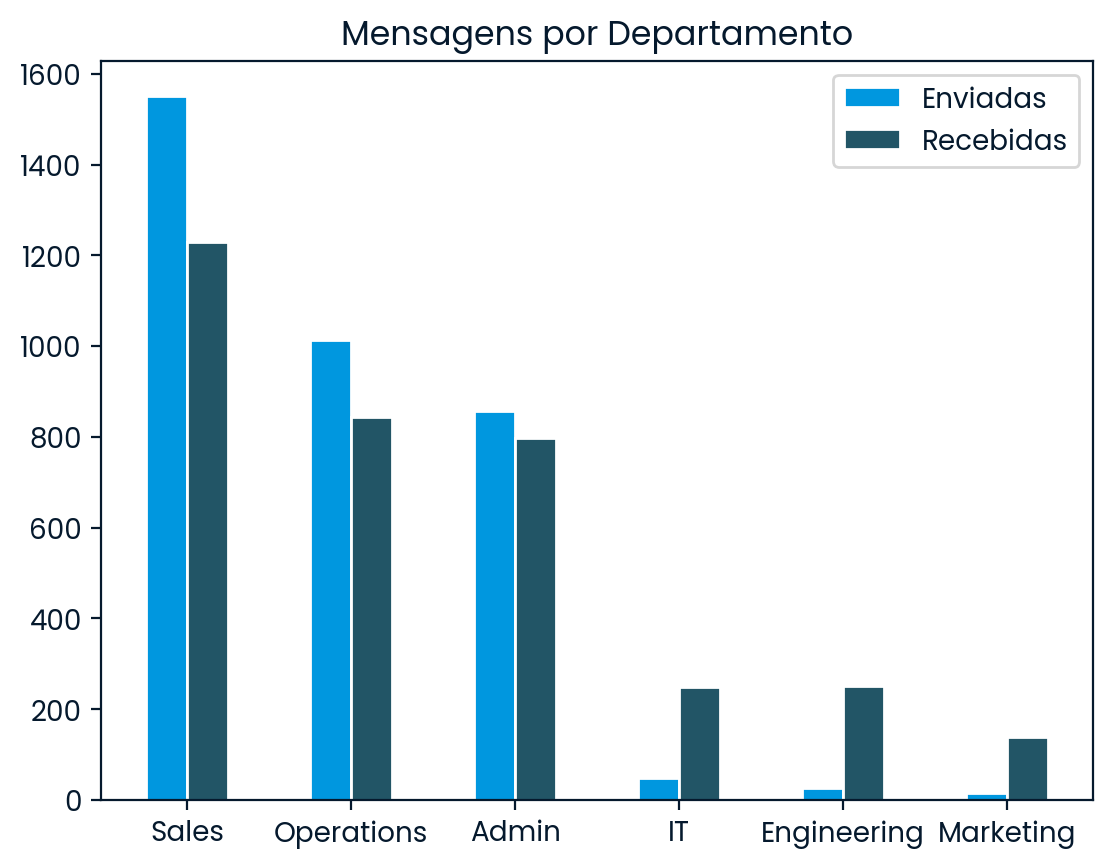

In [14]:
# criando um grafico para visualizar as mensagens enviadas e recebidas por departamento

plt.bar(enviadas_departamento.index, enviadas_departamento.values, color='#0097DF', label='Enviadas',width=-0.25,edgecolor='white',align='edge')
plt.bar(recebidas_departamento.index, recebidas_departamento.values, color='#225566', label='Recebidas',width=0.25,edgecolor='white',align='edge')
plt.title('Mensagens por Departamento')
plt.legend()
plt.show()

O departamento com maior atividade é o de Vendas (Sales) e o com a menor e o de Marketing

### Conexões dos Empregados

In [15]:
# agrupando e contando as mensagens por remetente 
enviadas_empregado = pd.DataFrame(mensagens.groupby('sender')['receiver'].count().sort_values(ascending=False))\
.reset_index().rename(columns={'receiver':'sent','sender':'employee'})
# agrupando e contando as mensagens por destinatário
recebidas_empregado = pd.DataFrame(mensagens.groupby('receiver')['sender'].count().sort_values(ascending=False))\
.reset_index().rename(columns={'sender':'received','receiver':'employee'})
# juntando os dois e criando também uma coluna com o total de mensagens em que o empregado está envolvido, enviadas + recebidas
contagem_mensagens = enviadas_empregado.merge(recebidas_empregado,on='employee',how='outer')
contagem_mensagens = contagem_mensagens.fillna(0)
contagem_mensagens['total_messages'] = contagem_mensagens.sent + contagem_mensagens.received
contagem_mensagens

,employee,sent,received,total_messages
0,605,459.0,37.0,496.0
1,128,266.0,5.0,271.0
2,144,221.0,8.0,229.0
3,509,216.0,14.0,230.0
4,389,196.0,22.0,218.0
...,...,...,...,...
659,1270,0.0,1.0,1.0
660,1273,0.0,1.0,1.0
661,1278,0.0,1.0,1.0
662,832,0.0,1.0,1.0


In [16]:
# agrupando por empregado que enviou a mensagem e contando o número de empregados únicos para o qual ele enviou mensagens
conexões_remetente = pd.DataFrame(mensagens.groupby('sender')['receiver'].nunique().sort_values(ascending=False))\
.reset_index().rename(columns={'receiver':'sent','sender':'employee'})
# agrupando por empregado que recebeu a mensagem e contando o número de empregados únicos para do qual ele recebeu mensagens
conexões_destinatário = pd.DataFrame(mensagens.groupby('receiver')['sender'].nunique().sort_values(ascending=False))\
.reset_index().rename(columns={'sender':'received','receiver':'employee'})

conexões = conexões_destinatário.merge(conexões_remetente,on='employee',how='outer')
conexões = conexões.fillna(0)
conexões

,employee,received,sent
0,194,13.0,0.0
1,32,11.0,0.0
2,249,9.0,0.0
3,1283,8.0,0.0
4,103,8.0,0.0
...,...,...,...
659,1605,0.0,1.0
660,186,0.0,1.0
661,1569,0.0,1.0
662,280,0.0,1.0


O empregado que se comunica com mais pessoas diferentes é o de id 598 (Administração), que enviou mensagens para 77 empregados diferentes, mas recebeu de apenas 7.

O empregado que é procurado por mais pessoas diferentes é o de id 194 (Operações), que recebeu mensagens de 13 empregados diferentes, mas não enviou para ninguem.

Também é interessante notar que apesar de o empregado 598 (Operações) ser o com mais conexões, o com mais mensagens é o 605 que enviou 459 e recebeu 37. Já o empregado 281 (Vendas) é quem mais recebeu mensagens 60, mas não enviou nenhuma

### Influencers

In [17]:
# criando uma nova coluna pra verificar se a mensagem influência uma outra
# o critério para uma mensagen influente usado aqui foi que dentro de 15 minutos após a mensagem chegar o destinatário enviou uma mensagem para alguém

mensagens_completo['influent'] = False 
for index, msg in mensagens_completo.iterrows(): 
    if (mensagens_completo[(mensagens_completo['sender'] == msg.receiver) & (mensagens_completo['timestamp'] >= msg.timestamp) & (mensagens_completo['timestamp'] <= msg.timestamp+timedelta(minutes=15))]).empty:
        mensagens_completo.at[index, 'influent'] = False
    else:
        mensagens_completo.at[index, 'influent'] = True

In [18]:
mensagens_completo.groupby('sender')['influent'].sum().sort_values(ascending=False)

sender
605     27
317     13
734     12
422      6
389      5
        ..
643      0
521      0
518      0
516      0
1881     0
Name: influent, Length: 85, dtype: int64

In [19]:
mensagens_completo.groupby('receiver')['influent'].sum().sort_values(ascending=False)

receiver
605     26
317     14
734     11
389      7
337      7
        ..
482      0
485      0
487      0
488      0
1890     0
Name: influent, Length: 617, dtype: int64

In [20]:
mensagens_completo.groupby('department_sender')['influent'].sum().sort_values(ascending=False)

department_sender
Admin          31
Sales          28
Operations     20
Marketing       3
Engineering     0
IT              0
Name: influent, dtype: int64

In [21]:
mensagens_completo.groupby('department_receiver')['influent'].sum().sort_values(ascending=False)

department_receiver
Admin          33
Sales          32
Operations     17
Engineering     0
IT              0
Marketing       0
Name: influent, dtype: int64

 Como não havia nenhuma especificação para o que significaria ser influente no contexto desses dados, eu considerei influente uma mensagem que ocasianou quem recebeu, a também enviar uma mensagem dentro de 15 minutos.

 Claro que somente com os dados de quem recebeu e o horario, não é possivel ter certeza que a mensagem enviada realmente teve influência, mas foi isso que foi considerado nesse cenário

 Levando isso em consideração, o funcionário mais influente é o 605 e o departamento mais influente é a Administração

### Distribuição de empregados entre setores

Também precisamos olhar os cenários específicos, ou seja, as comunicações entre diferentes países, e também as comunicações entre os setores dentro de um país. 

Para começar foi analizado a distribuição de empregados por departamentos de forma geral, e a distribuição por departamentos em cada país

In [22]:
#Distribuição de empregados por departamentos dentro da empresa inteira
distribuição_empresa = empregados.department.value_counts(normalize=True).round(2)
print("Distribuição de empregados por departamento da empresa - %\n\n",distribuição_empresa)

Distribuição de empregados por departamento da empresa - %

 Sales          0.24
Admin          0.21
Operations     0.20
Engineering    0.15
IT             0.12
Marketing      0.08
Name: department, dtype: float64


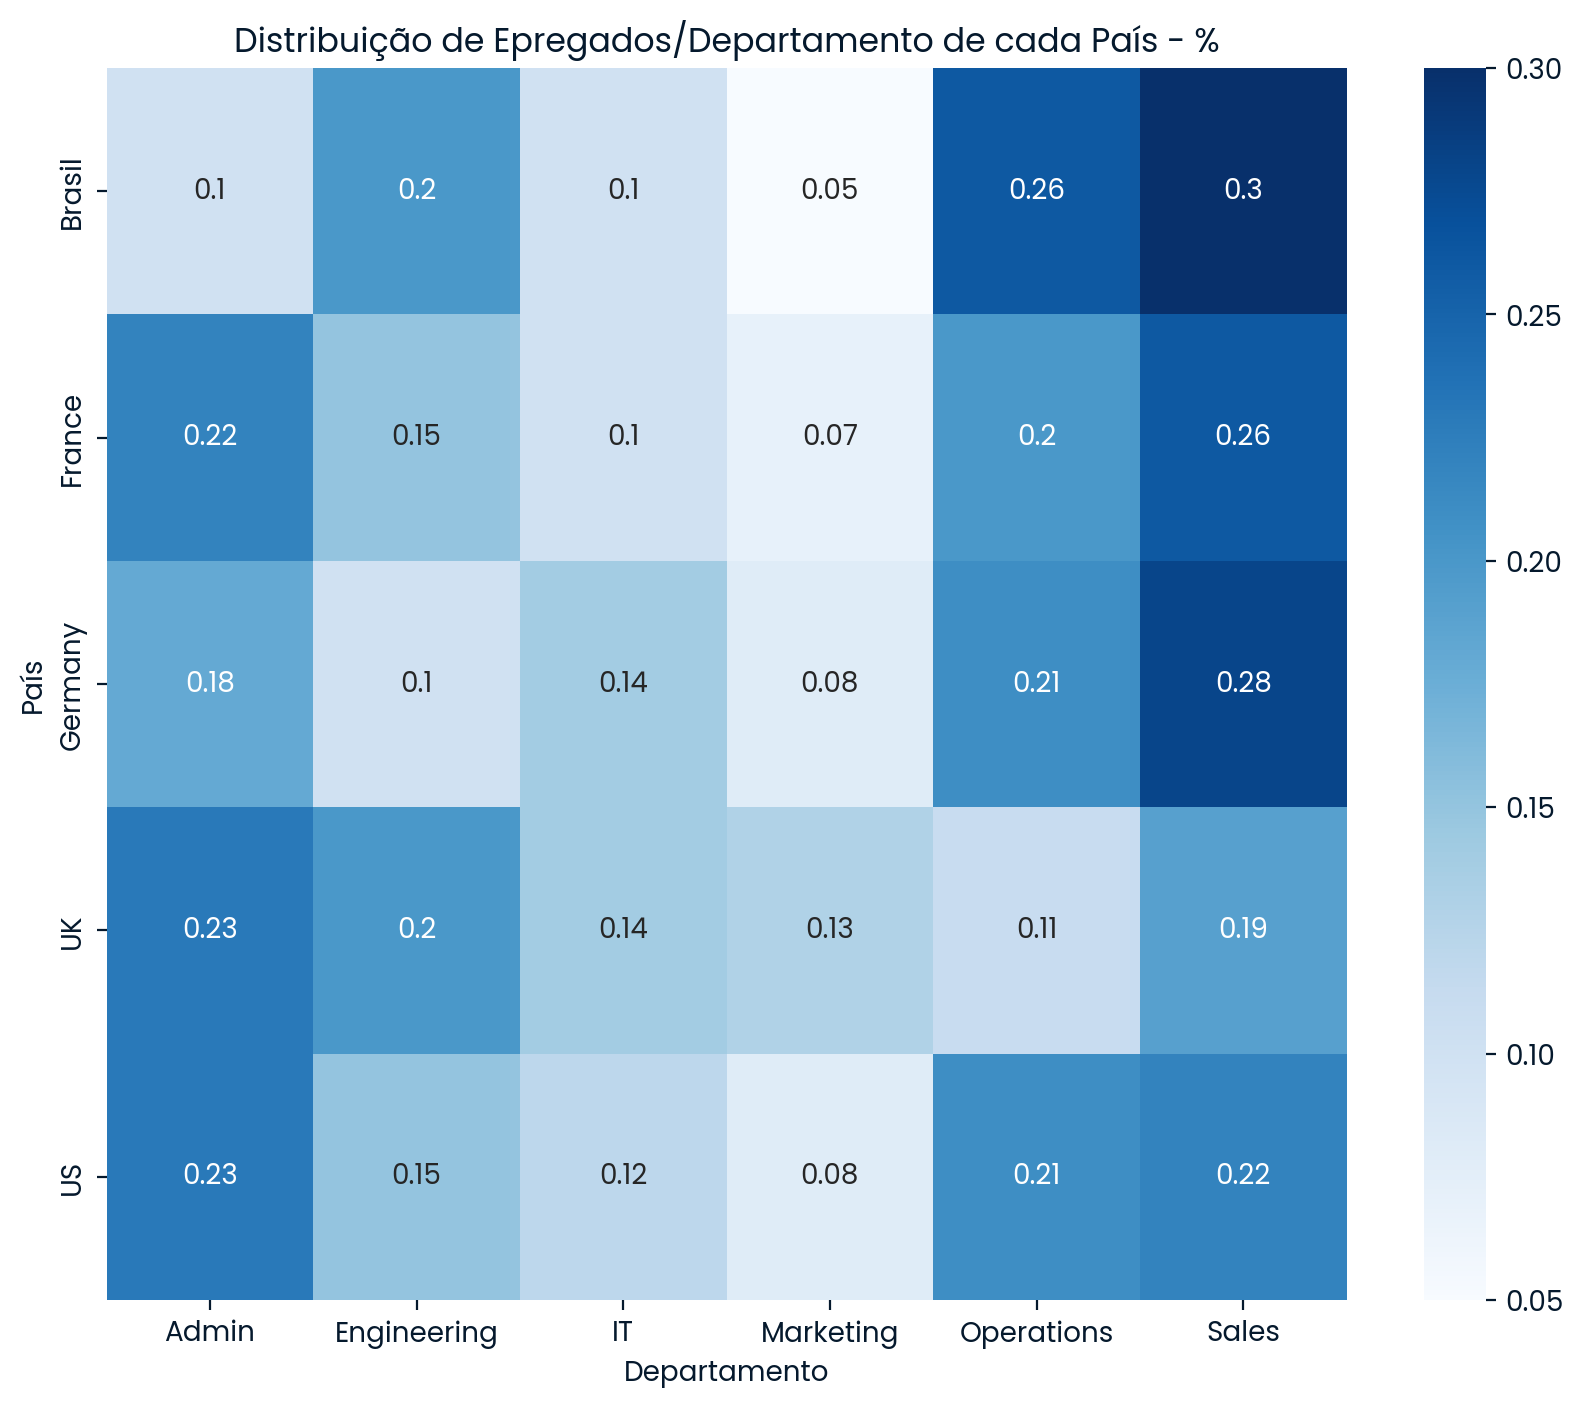

In [23]:
quant_empregados_pais = pd.Series(empregados.location.value_counts())
departamento_paises = empregados.pivot_table(index='location', columns='department', values='id', aggfunc='count', fill_value=0).divide(quant_empregados_pais,axis=0).round(2)

plt.figure(figsize=(10, 8))
sns.heatmap(departamento_paises, cmap='Blues', annot=True, fmt='g')
plt.title('Distribuição de Epregados/Departamento de cada País - %')
plt.xlabel('Departamento')
plt.ylabel('País')
plt.show()

In [24]:
empregados_mkt = empregados[empregados['department']=="Marketing"].location.value_counts()
print("Nº de empregados de Marketing\n\n",empregados_mkt)

Nº de empregados de Marketing

 US         21
France     11
UK          9
Germany     8
Brasil      3
Name: location, dtype: int64


O departamento de Vendas (Sales) é onde estão alocados a maioria dos empregados da empresa, e isso ocorre em 3 dos 5 países onde a empresa opera, com exceção dos Estados Unidos (US) e do Reino Unido.

Já o departamento de Marketing é onde se concentra a menor quantidade de funcionários, e com exceção do Reino Unido (UK), isso ocorre em todos os países onde a empresa opera

Agora é hora de verificar a taxa de mensagens por empregado em cada setor de cada país. Mas antes, é importante verificar a taxa geral de cada país

In [25]:
mensagens_por_empregado_pais = mensagens_completo.location_sender.value_counts().divide(quant_empregados_pais).round(2)
mensagens_por_empregado_pais

Brasil     2.07
France     9.51
Germany    3.20
UK         0.86
US         5.47
dtype: float64

Na frança é onde os empregado se comunicam mais, com uma média de 9.51 mensagens por funcionário, e o Reino Unido (UK) tem a pior média 0.86

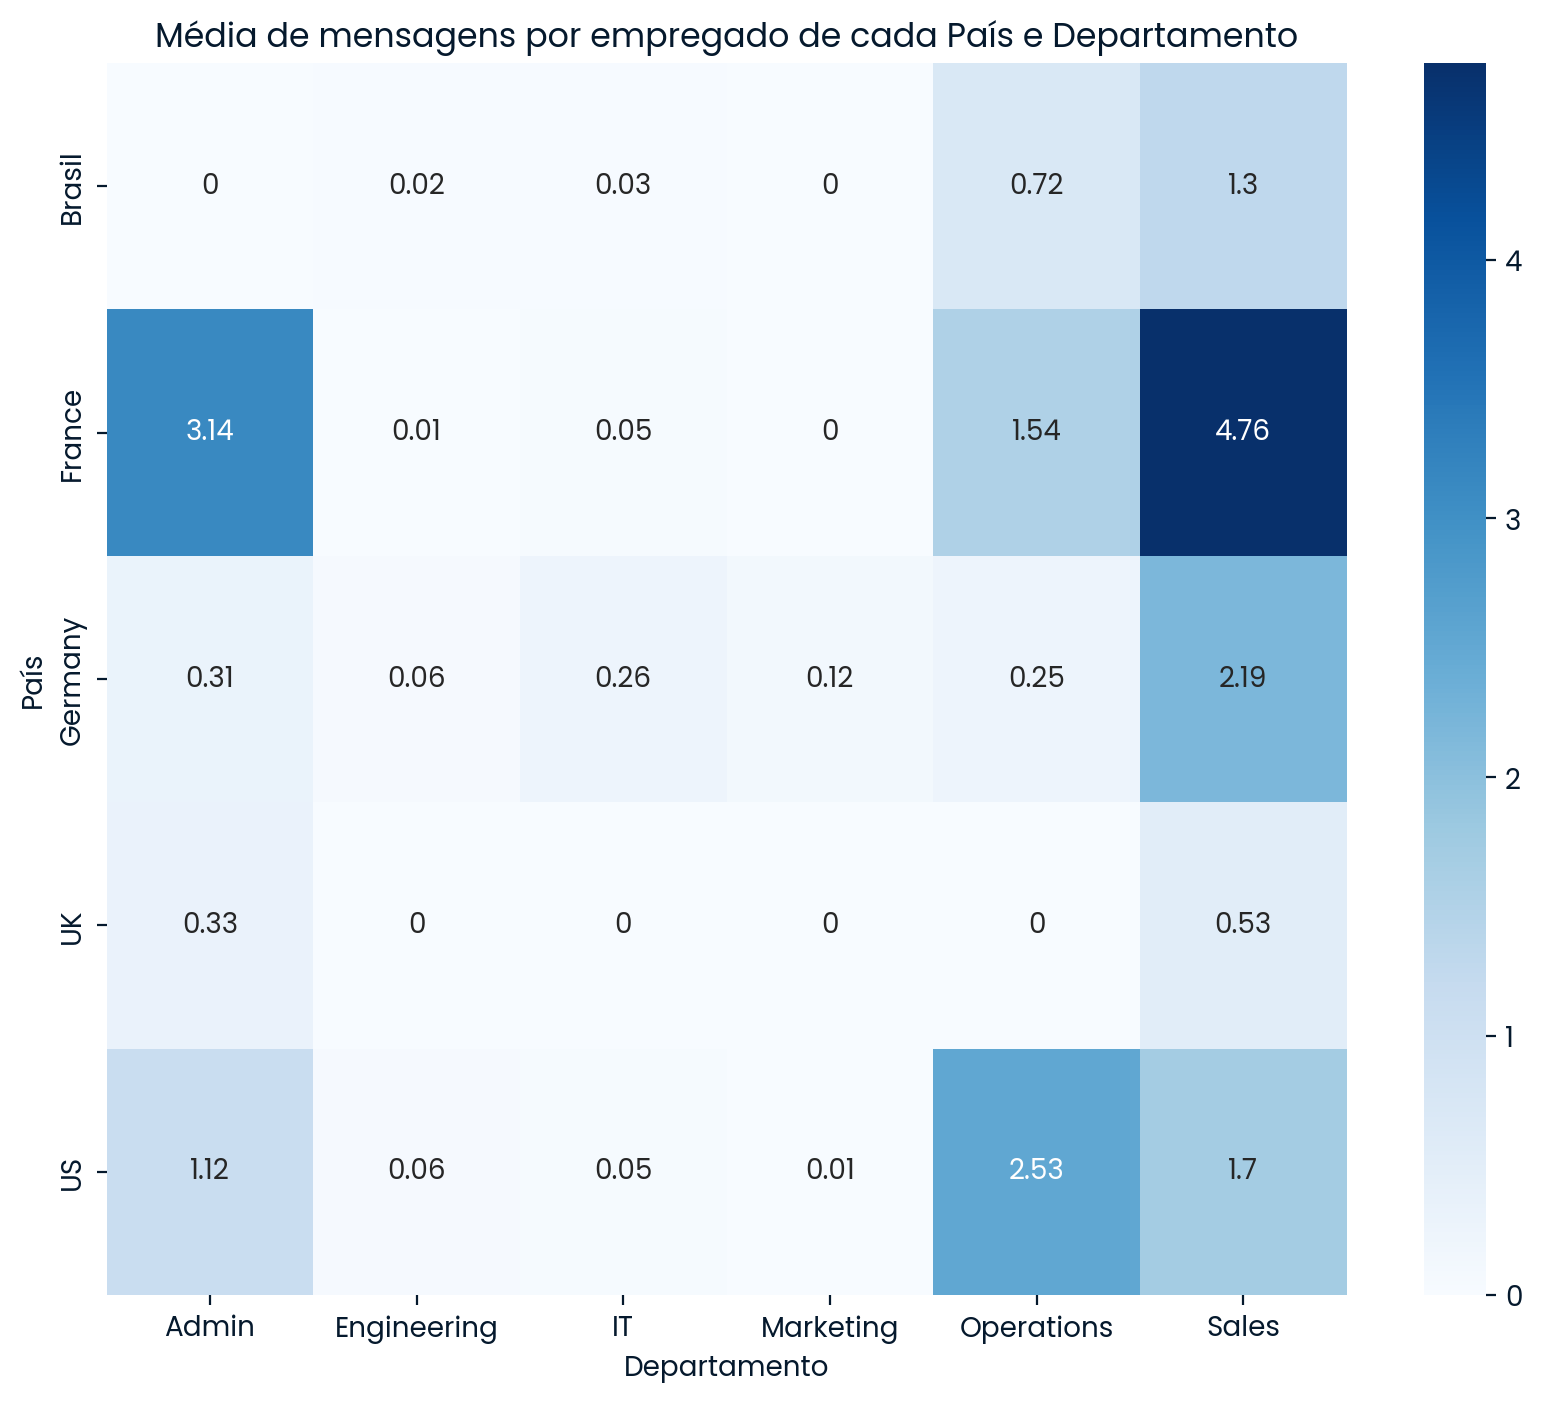

In [26]:
quant_empregados_pais = pd.Series(empregados.location.value_counts())
mensagens_por_empregado_pais_e_departamento = mensagens_completo.pivot_table(index='location_sender', columns='department_sender', values='sender', aggfunc='count', fill_value=0).divide(quant_empregados_pais,axis=0).round(2)

plt.figure(figsize=(10, 8))
sns.heatmap(mensagens_por_empregado_pais_e_departamento, cmap='Blues', annot=True, fmt='g')
plt.title('Média de mensagens por empregado de cada País e Departamento')
plt.xlabel('Departamento')
plt.ylabel('País')
plt.show()

Os três departamentos, Marketing, TI e Engenharia, se mostraram os menos comunicativos entre todos os países, mas o mais curioso aqui foi que para o Reino Unido(UK), além desses três departamentos, o de operações também não se comunica bem, no caso não se comunicam nada. Vale ressaltar que por o valor ter sido arredondado, pode ser que não seja realmente 0 mensagens.

Antes de continuar, é importante conferir os reais valores do Reino Unido

In [27]:
mensagens_uk = mensagens_completo[mensagens_completo.location_sender=="UK"].department_sender.value_counts()
print("Mensagens Reino Unido\n",mensagens_uk)

Mensagens Reino Unido
 Sales    37
Admin    23
Name: department_sender, dtype: int64


Apesar de o arrendondamento ser um fator que poderia dar uma falsa impressão aos resultados nos gráficos anteriores. O Reino Unido apenas tem mensagens enviadas pelos departamentos de Vendas e pela Administração

In [28]:
mensagens_mkt = mensagens_completo[mensagens_completo.department_sender=="Marketing"].location_sender.value_counts()
print("Mensagens Marketing\n",mensagens_mkt)

Mensagens Marketing
 Germany    12
US          4
Name: location_sender, dtype: int64


A mesma situação se aplica no caso dos departamentos, mas para o de Marketing. Apenas os departamentos de Marketing da Alemanha e dos Estados Unidos enviaram alguma mensagem

### Comunicação entre países e entre setores

Para finalizar vamos analisar a comunicação entre os países e comunicação entre setores da empresa de forma geral. Para isso será utilizado a média de mensagens por empregado novamente

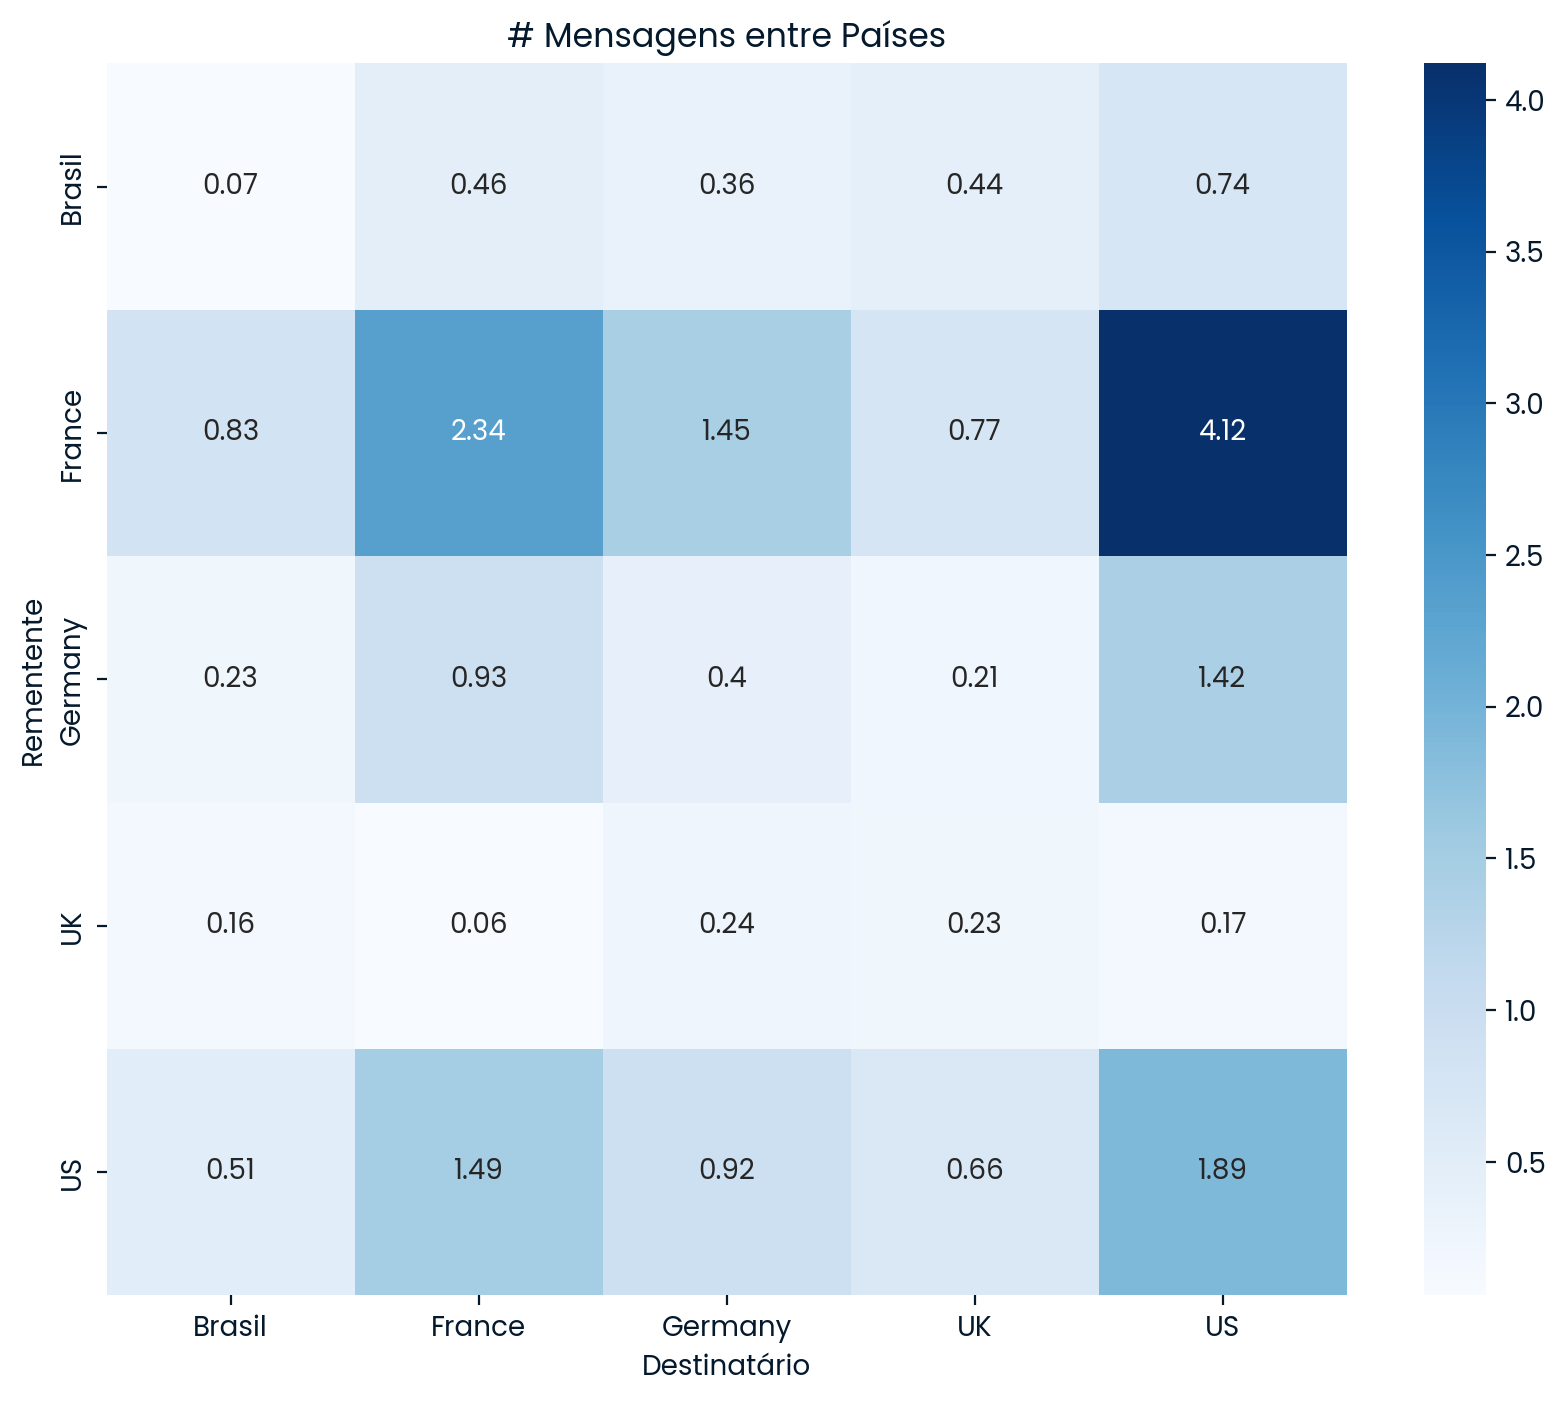

In [29]:
# criando dados para a visualização, dividindo o número de mensagens por localidade pela quantidade funcionários
quant_empregados = pd.Series(empregados.location.value_counts())
dados_heatmap = mensagens_completo.pivot_table(index='location_sender', columns='location_receiver', values='sender', aggfunc='count', fill_value=0).divide(quant_empregados,axis=0).round(2)

# visualizando os dados em um mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(dados_heatmap, cmap='Blues', annot=True, fmt='g')
plt.title('# Mensagens entre Países')
plt.xlabel('Destinatário')
plt.ylabel('Rementente')
plt.show()

Na comunicação entre paises, Reino Unido e Brasil apresentam os piores resultados, e Estados Unidos e França os melhores

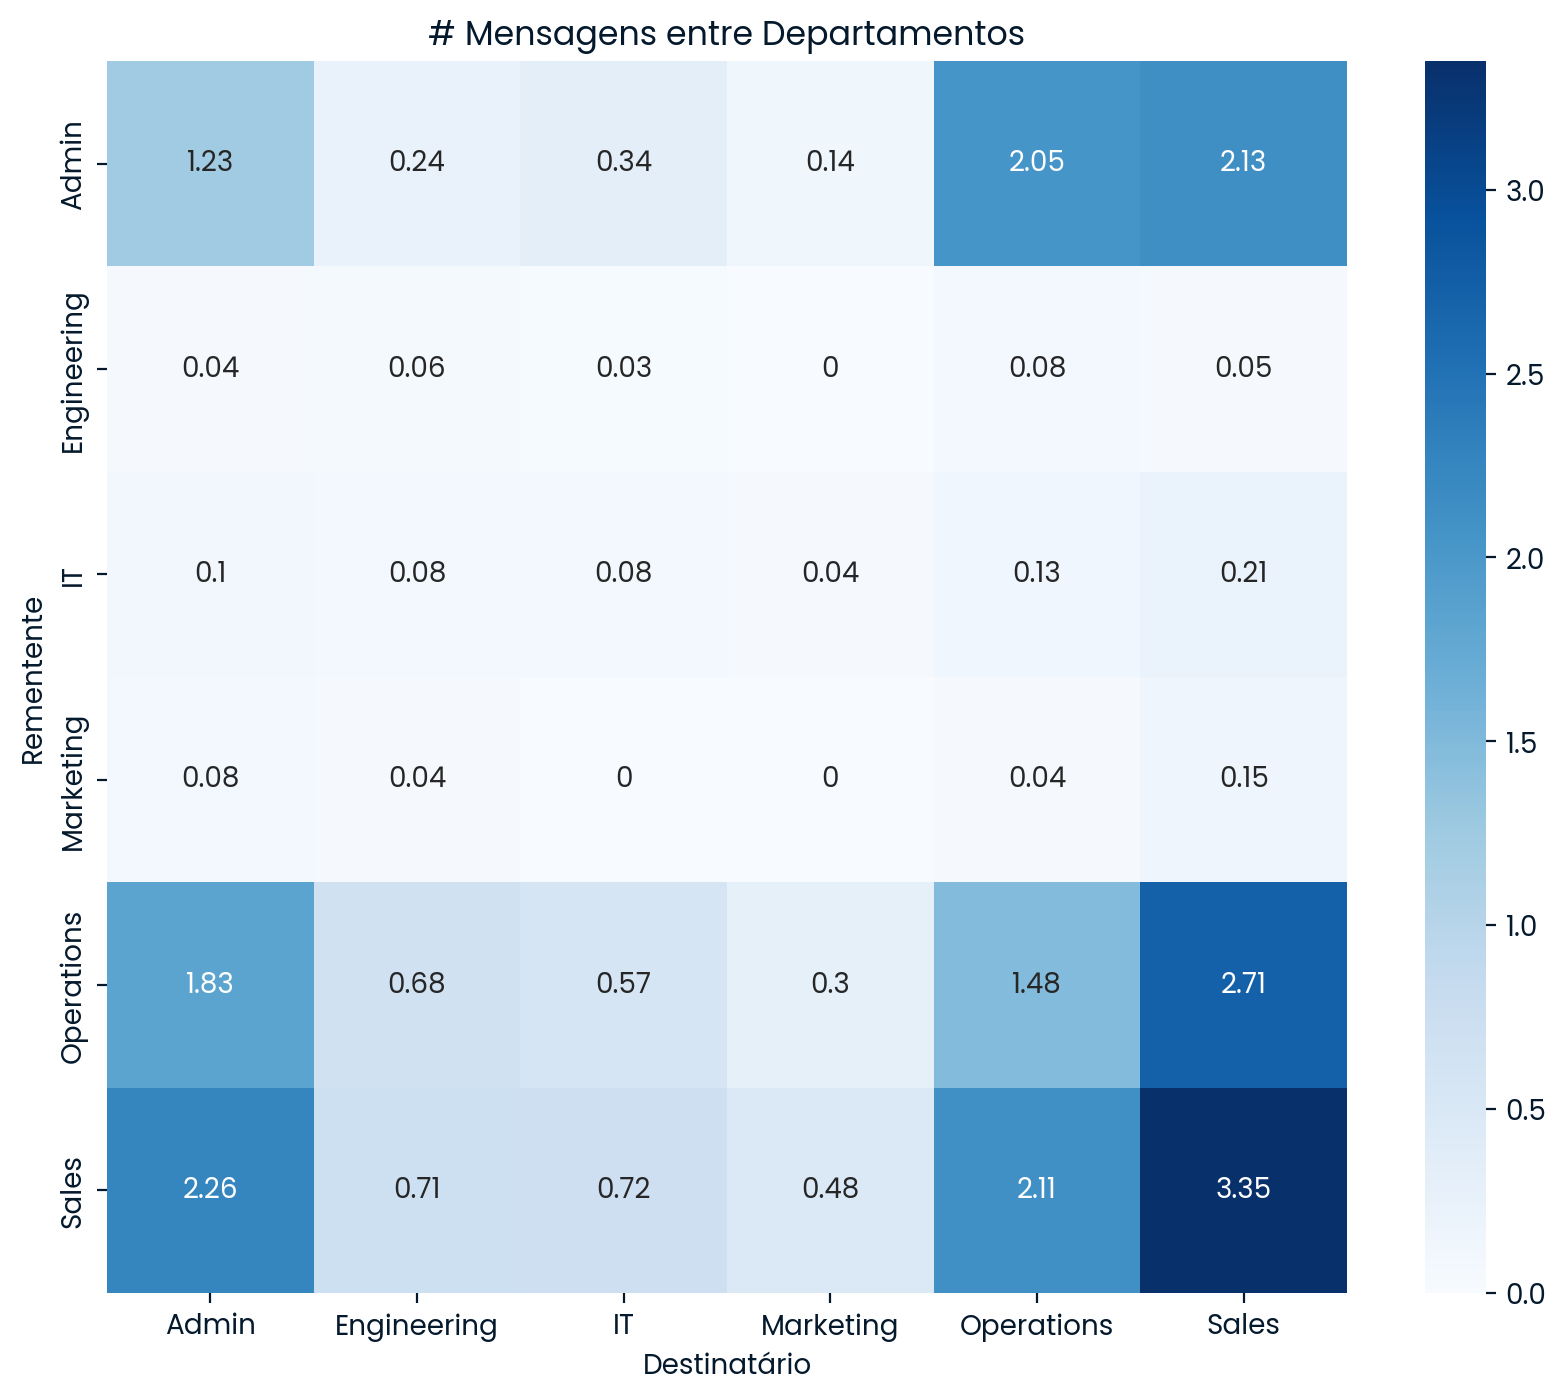

In [30]:
# criando dados para a visualização, dividindo o número de mensagens por localidade pela quantidade funcionários
quant_empregados = pd.Series(empregados.department.value_counts())
dados_heatmap = mensagens_completo.pivot_table(index='department_sender', columns='department_receiver', values='sender', aggfunc='count', fill_value=0).divide(quant_empregados,axis=0).round(2)

# visualizando os dados em um mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(dados_heatmap, cmap='Blues', annot=True, fmt='g')
plt.title('# Mensagens entre Departamentos')
plt.xlabel('Destinatário')
plt.ylabel('Rementente')
plt.show()

Na comunicação entre departamentos, os de Marketing, Engenharia e TI se destacam negativamente.

## Conclusão

Foi possivel observar atráves das analises que o departamento com mais mensagens é o de Vendas, e o com menos é o de Marketing. O empregado com mais conexões é o 598 do departamento de Operações, mas o com mais mensagens é o 605 da Administração que é o empregado mais influente. 

A definição de influente usada aqui foi que ao enviar uma mensagem, quem recebeu enviou uma mensagem para alguém em até 15 minutos, e assim o empregado com mais mensagem nesse criterio foi considerado o mais influente. Também vale ressaltar que as conexões entre departamento aonde não foram enviadas nenhuma mensagem, todas envolvem o departamento de Marketing, que não mandou nenhuma mensagem para o departamento de TI e nem para o próprio departamento, além disso não recebeu nenhuma mensagem do departamento de Engenharia. Essse 3 departamentos (TI, Engenharia, Marketing) são os 3 com o menor número de mensagem, seja enviadas ou recebidas. 

Após analisar o número de mensagens por empregados, o departamento de Marketing foi o que se destacou mais negativamente, tendo até países onde nenhuma mensagem foi enviada pelo departamento de Marketing. Além disso o Reino Unido (UK) é o país com a pior média de mensagens por empresários entre os paises. 

Com o intuito de aprimorar a comunicação da empresa, o caminho a ser seguido é realizar campanhas de incentivo à comunicação, com foco nas segmentações que se comunicam menos, nesse caso os departamentos de Marketing de modo geral, e todos os departamentos do Reino Unido. Apesar de esses serem os principais focos, também é importante notar que os departamentos de TI e de Engenharia também tem se comunicado pouco, assim como os funcionários do Brasil